In [126]:
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
movies = pd.read_csv('data/movies_data.csv',index_col=['tconst'])

movies = movies.drop('Unnamed: 0',axis=1)

movies['numVotes'] = movies['numVotes'].astype('int')

movies = movies.dropna(subset='startYear')

movies['startYear'] = movies['startYear'].astype('int')

In [128]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324774 entries, tt0000009 to tt9916730
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   primaryTitle    324774 non-null  object 
 1   originalTitle   324774 non-null  object 
 2   isAdult         324774 non-null  int64  
 3   startYear       324774 non-null  int64  
 4   runtimeMinutes  291709 non-null  float64
 5   genres          313876 non-null  object 
 6   averageRating   324774 non-null  float64
 7   numVotes        324774 non-null  int64  
 8   directors       320731 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 24.8+ MB


In [129]:
movies.head()

,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,directors
tconst,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,0,1894,45.0,Romance,5.4,218,Alexander Black
tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100.0,"Documentary,News,Sport",5.3,549,Enoch J. Rector
tt0000502,Bohemios,Bohemios,0,1905,100.0,NaN,3.8,20,Ricardo de Baños
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70.0,"Action,Adventure,Biography",6.0,969,Charles Tait
tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,90.0,Drama,5.6,30,Michel Carré


In [130]:
bins = [1800,
    1900,
    1910,
    1920,
    1930,
    1940,
    1950,
    1960,
    1970,
    1980,
    1990,
    2000,
    2010,
    2020,
    2030
 ]

labels = [
    "pré 1900",
    '1900',
    '1910',
    '1920',
    '1930',
    '1940',
    '1950',
    '1960',
    '1970',
    '1980',
    '1990',
    '2000',
    '2010',
    '2020'
    ]

movies['decades'] = pd.cut(movies['startYear'],bins=bins,labels=labels)


#### Analise de tendências por décadas:
- Como variou a quantidade de filmes produzidos?
- Como variou o tempo médio de duração de um filme?
- Existe variações no rating média dos filmes?

In [131]:
movie_by_dec = movies.groupby('decades').agg({'primaryTitle': 'count', 'runtimeMinutes':'mean', 'averageRating': 'mean'}).reset_index()
movie_by_dec.head()

,decades,primaryTitle,runtimeMinutes,averageRating
0,pré 1900,12,76.666667,4.200000
1,1900,117,68.000000,4.491453
2,1910,2408,73.407207,5.833306
3,1920,4593,79.471679,6.062378
4,1930,9794,80.715201,6.109567


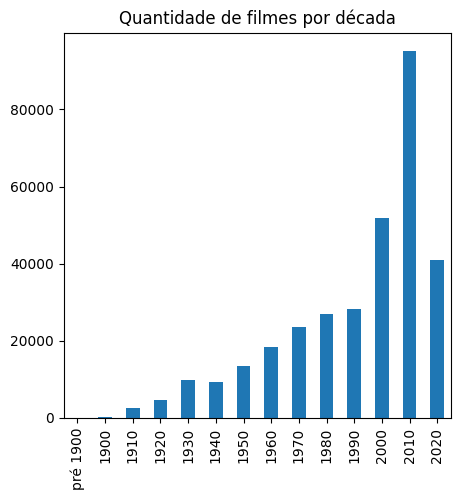

In [132]:
ax = movie_by_dec.plot.bar('decades','primaryTitle',legend=False,figsize=(5,5),title='Quantidade de filmes por década',xlabel='')

Desde a criação do cinema em 1895 a quantidade de filmes produzidos vem aumentando continuamente.  

<Axes: title={'center': 'Evolução da taxa de crescimento dos filmes por década'}, xlabel='Décadas', ylabel='Taxa de Crescimento em %'>

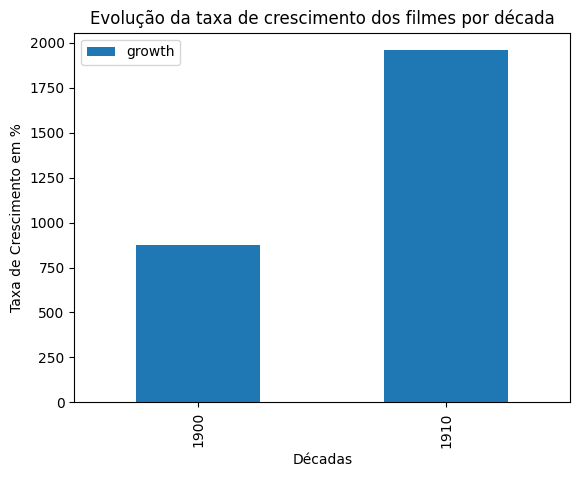

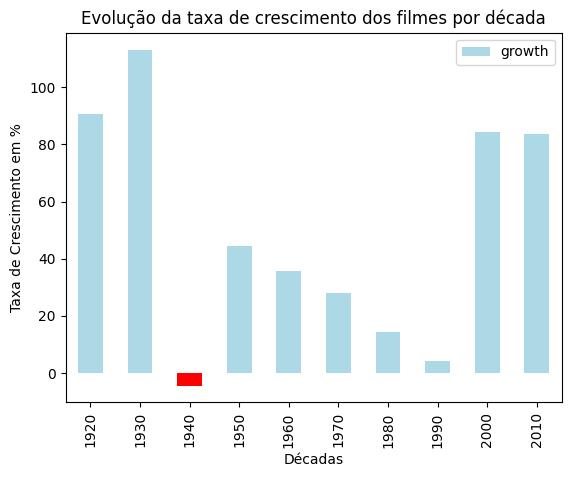

In [195]:
movie_growth = movie_by_dec.loc[movie_by_dec['decades'] != '2020',['decades','primaryTitle']]

movie_growth['diff'] =  movie_growth['primaryTitle'].diff(periods=1)

movie_growth['shifted'] = movie_growth['primaryTitle'].shift(periods=1)

movie_growth = movie_growth.dropna()

movie_growth['growth'] = (movie_growth['primaryTitle']/movie_growth['shifted'] - 1)*100

pre_1920 = movie_growth[movie_growth['decades'].isin(['1900','1910'])]
pos_1920 = movie_growth[~movie_growth['decades'].isin(['1900','1910'])]

colors_diff = ['red' if val < 0 else 'lightblue' for val in pos_1920['growth']]


pre_1920.plot.bar(x='decades',y='growth',xlabel='Décadas',ylabel='Taxa de Crescimento em %',title='Evolução da taxa de crescimento dos filmes por década')
pos_1920.plot.bar(x='decades',y='growth',xlabel='Décadas',ylabel='Taxa de Crescimento em %',title='Evolução da taxa de crescimento dos filmes por década', color=colors_diff)


A taxa de crescimento mostra que no último século tem havido um aumento quase continuo da quantidade de filmes produzido. Dos gráficos podemos tirar alguns insights: 
- A grande explosão do cinema ocorreu na décadas de 1900 e 1910. 
- Na década de 40 existiu um leve declino na produção de filmes.
- De 1950 até 1990 houve na taxa de crescimento na produção de filmes.

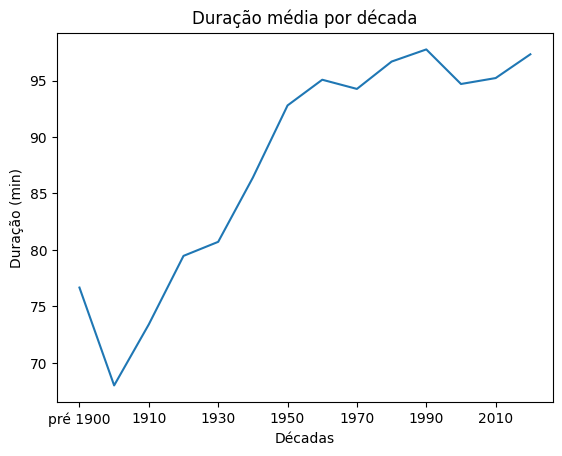

In [133]:
ax = movie_by_dec.plot.line('decades','runtimeMinutes',legend=False, xlabel='Décadas',ylabel='Duração (min)',title='Duração média por década')

Podemos verificar que a duração média do filmes foi aumentando continuamente até atingir um platô em 1960 e permanecer próximo ao tempo de 1 hora e 40 minutos.

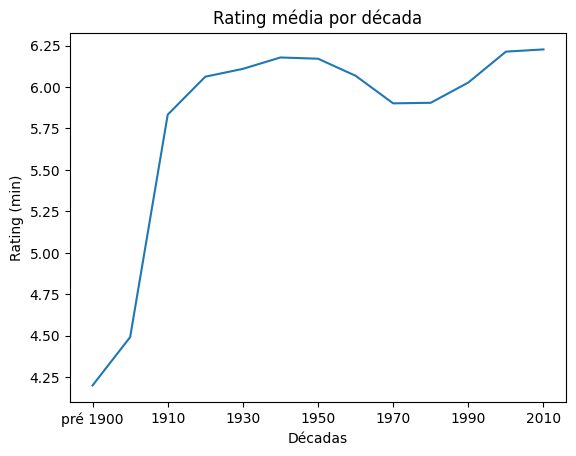

In [197]:
ax = movie_by_dec[movie_by_dec['decades'] != '2020'].plot.line('decades','averageRating',legend=False, xlabel='Décadas',ylabel='Rating (min)',title='Rating média por década')